# REAL OR NOT? CLASSIFY TWEETS

In [1]:
#import lib
import re
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
import string

%matplotlib inline

In [2]:
#read data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#sub=pd.read_csv('sample_submission.csv')

In [3]:
train.head()   #initial cleaning while looking first 5 tweets...remove punctuation and special characters,numbers,stopwords
               #and apply lemma or stemma

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()    #initial cleaning while looking first 5 tweets...remove punctuation and special characters,numbers,stopwords
               #and apply lemma or stemma

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
#lets combine both the data sets to make our work easy..
all_set=train.append(test,ignore_index=True)   #7613 -test

In [6]:
#this is how combined data sets looks now lets work towards cleaning dataset
all_set

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...
5,8,NaN,NaN,1.0,#RockyFire Update => California Hwy. 20 closed...
6,10,NaN,NaN,1.0,#flood #disaster Heavy rain causes flash flood...
7,13,NaN,NaN,1.0,I'm on top of the hill and I can see a fire in...
8,14,NaN,NaN,1.0,There's an emergency evacuation happening now ...
9,15,NaN,NaN,1.0,I'm afraid that the tornado is coming to our a...


In [7]:
#lets check if we have any null values
all_set.isnull().sum()

id             0
keyword       87
location    3638
target      3263
text           0
dtype: int64

# DATA CLEANING

In [8]:
#lets create a loop
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
#user-defined function to remove unwanted text patterns from the tweets. 
#It takes two arguments, one is the original string of text and the other 
#is the pattern of text that we want to remove from the string. The function 
#returns the same input string but without the given pattern.

def remove_pattern(input_txt, pattern):                 #para
    r = re.findall(pattern, input_txt)                  #list of txts
    for i in r:                                         #
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [10]:
#remove username tag "@"
all_set['tweet'] = np.vectorize(remove_pattern)(all_set['text'], "@[\w]*") 
all_set['tweet'].head(2)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
Name: tweet, dtype: object

In [11]:
#remove Punctuations, Numbers, and Special Characters
all_set['tweet'] = all_set['tweet'].str.replace("[^a-zA-Z#]"," ")
all_set['tweet'].head(2)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask  Canada
Name: tweet, dtype: object

In [12]:
#remove shortwords / stopwords
all_set['tweet'] = all_set['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
all_set['tweet'].head(2)

0    Deeds Reason this #earthquake ALLAH Forgive
1             Forest fire near Ronge Sask Canada
Name: tweet, dtype: object

In [13]:
#tokenzation(words)
token_twt=all_set['tweet'].apply(lambda x: x.split())
token_twt.head(2)

0    [Deeds, Reason, this, #earthquake, ALLAH, Forg...
1            [Forest, fire, near, Ronge, Sask, Canada]
Name: tweet, dtype: object

# STEMMING

In [14]:
from nltk.stem.porter import *
stem = PorterStemmer()

In [15]:
token_twt = token_twt.apply(lambda x: [stem.stem(i) for i in x])
token_twt.head(2)

0    [deed, reason, thi, #earthquak, allah, forgiv]
1          [forest, fire, near, rong, sask, canada]
Name: tweet, dtype: object

### Lets stich back the tokens

In [16]:
for i in range(len(token_twt)):
    token_twt[i] = ' '.join(token_twt[i])
    
all_set['tweet'] = token_twt

In [17]:
all_set.head(2)

,id,keyword,location,target,text,tweet
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...,deed reason thi #earthquak allah forgiv
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada,forest fire near rong sask canada


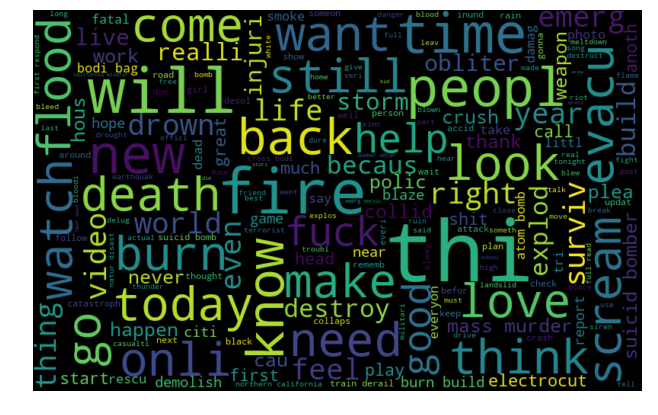

In [18]:
#lets visualize the data now(wordcloud)
all_words=' '.join([text for text in all_set['tweet']])
from wordcloud import WordCloud
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


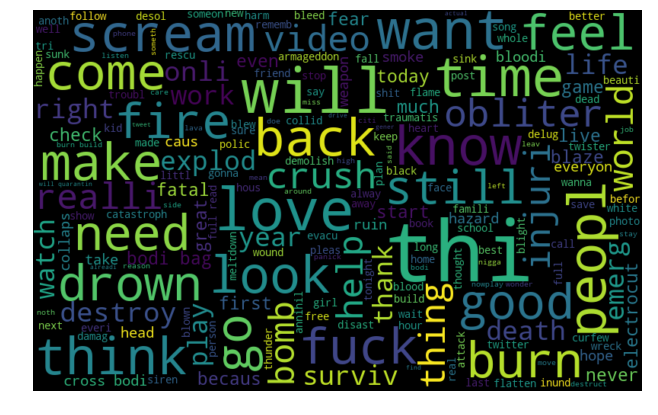

In [19]:
#check wordcloud  for fake disaster tweets
fake_words = ' '.join([text for text in all_set['tweet'][all_set['target']== 0 ]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(fake_words)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

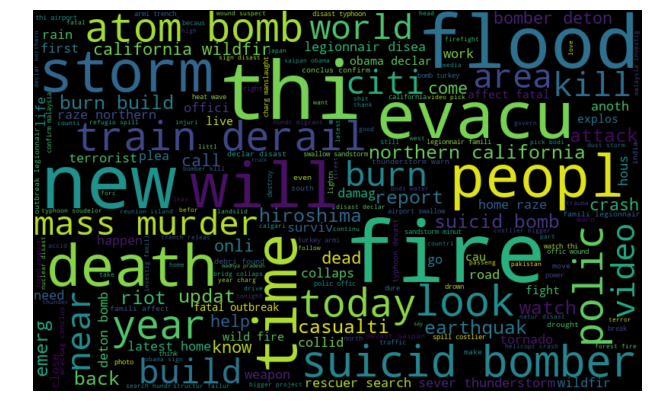

In [20]:
#check wordcloud  for real disaster tweets
real_words = ' '.join([text for text in all_set['tweet'][all_set['target']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(real_words)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_vect =  CountVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=1000)
# bag-of-words feature matrix
bow = bow_vect.fit_transform(all_set['tweet'])



In [22]:
#tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect =  TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                              ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
# TF-IDF feature matrix
X = tf_idf_vect.fit_transform(all_set['tweet'])  #defined X here for train_tets_split

## TRAIN A MODEL

In [23]:
from sklearn.model_selection import train_test_split
#X = all_set['tweet']
y = all_set['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=False)

In [24]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## PREDICT AND SUBMISSION

In [25]:
pre =  model.predict(X_test)

In [26]:
sub =pd.read_csv('sample_submission.csv')
sub["target"] = pre.astype(int)
sub.to_csv("submission04.csv", index=False)